<a href="https://colab.research.google.com/github/DeepPandya30/DHC/blob/main/Grey_Wolf_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 1: Best Path = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (3, 0), (2, 0), (3, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 1), (5, 1), (5, 2), (5, 1), (4, 1), (5, 1), (5, 2), (5, 1), (4, 1), (4, 2), (4, 1), (3, 1), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 0), (3, 0), (4, 0), (3, 0), (4, 0), (3, 0), (4, 0), (4, 1), (4, 2), (3, 2), (3, 1), (4, 1), (4, 0), (5, 0), (4, 0), (4, 1), (3, 1), (3, 2), (4, 2), (4, 3), (4, 2), (5, 2), (4, 2), (5, 2), (4, 2), (4, 3), (4, 4), (5, 4), (5, 3), (5, 4), (4, 4), (5, 4), (5, 3), (5, 4), (5, 3), (5, 4), (5, 5)], Length = 67
Iteration 2: Best Path = [(0, 0), (0, 0), (2, 1), (3, 1), (4, 0), (2, 1), (2, 0), (1, 0), (1, 0), (3, 0), (4, 1), (5, 2), (4, 2), (4, 2), (5, 1), (1, 0), (5, 3), (3, 2), (5, 1), (3, 2), (5, 1), (4, 1), (2, 1), (4, 1), (3, 1), (2, 1), (4, 2), (4, 1), (2, 0), (3, 1), (4, 1), (3, 0), (4, 0), (3, 0), (5, 2), (4, 1), (5, 2), (3, 1), (3, 1), (4, 1), (4, 1), (4, 1), (4, 0), (5, 1), (5, 1), (3, 0), (5, 1), (5, 2), (4, 2), (2, 1),

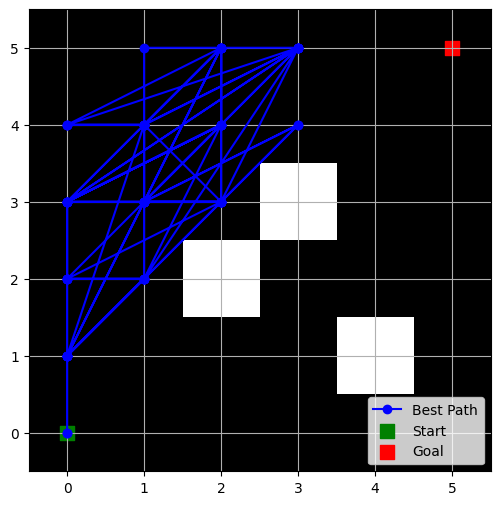

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Define Grid Environment
GRID_SIZE = 6  # 6x6 Grid
START = (0, 0)
GOAL = (5, 5)
OBSTACLES = {(2, 2), (3, 3), (1, 4)}  # Set of obstacle coordinates

# Parameters for GWO
NUM_WOLVES = 10
MAX_ITER = 10
ALPHA, BETA, DELTA = None, None, None  # Best solutions

# Generate Random Solutions (Paths)
def initialize_wolves():
    wolves = []
    for _ in range(NUM_WOLVES):
        path = [START]
        while path[-1] != GOAL:
            x, y = path[-1]
            next_moves = [(x+1, y), (x, y+1), (x-1, y), (x, y-1)]
            next_moves = [(nx, ny) for nx, ny in next_moves if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE and (nx, ny) not in OBSTACLES]
            if not next_moves:
                break  # Dead end
            path.append(random.choice(next_moves))
        wolves.append(path)
    return wolves

# Fitness Function: Shorter paths are better
def fitness_function(path):
    return len(path) if path[-1] == GOAL else 999  # Penalize incomplete paths

# Update Wolves Positions (Grey Wolf Hunting Mechanism)
def update_wolves(wolves, a):
    global ALPHA, BETA, DELTA
    new_wolves = []
    for path in wolves:
        new_path = [START]
        for i in range(1, min(len(path), len(ALPHA))):
            x, y = path[i]
            A1, A2, A3 = a * (2 * random.random() - 1), a * (2 * random.random() - 1), a * (2 * random.random() - 1)
            D_alpha = np.linalg.norm(np.array(ALPHA[i]) - np.array((x, y)))
            D_beta = np.linalg.norm(np.array(BETA[i]) - np.array((x, y)))
            D_delta = np.linalg.norm(np.array(DELTA[i]) - np.array((x, y)))
            X_new = ((ALPHA[i][0] - A1 * D_alpha) + (BETA[i][0] - A2 * D_beta) + (DELTA[i][0] - A3 * D_delta)) / 3
            Y_new = ((ALPHA[i][1] - A1 * D_alpha) + (BETA[i][1] - A2 * D_beta) + (DELTA[i][1] - A3 * D_delta)) / 3
            X_new, Y_new = int(round(X_new)), int(round(Y_new))
            if (X_new, Y_new) in OBSTACLES or not (0 <= X_new < GRID_SIZE and 0 <= Y_new < GRID_SIZE):
                new_path.append(path[i])
            else:
                new_path.append((X_new, Y_new))
        new_wolves.append(new_path)
    return new_wolves

# Run Grey Wolf Optimizer for Path Planning
def grey_wolf_optimizer():
    global ALPHA, BETA, DELTA
    wolves = initialize_wolves()
    for iter in range(MAX_ITER):
        wolves = sorted(wolves, key=fitness_function)
        ALPHA, BETA, DELTA = wolves[0], wolves[1], wolves[2]
        a = 2 - iter * (2 / MAX_ITER)  # Decreasing coefficient
        wolves = update_wolves(wolves, a)
        print(f"Iteration {iter+1}: Best Path = {ALPHA}, Length = {len(ALPHA)}")
    plot_path(ALPHA)

# Plot the Best Path
def plot_path(best_path):
    grid = np.zeros((GRID_SIZE, GRID_SIZE))
    for ox, oy in OBSTACLES:
        grid[ox, oy] = -1  # Mark obstacles

    path_x, path_y = zip(*best_path)
    plt.figure(figsize=(6,6))
    plt.imshow(grid, cmap='gray_r', origin='lower')
    plt.plot(path_y, path_x, marker='o', color='b', label='Best Path')
    plt.scatter(START[1], START[0], color='g', marker='s', s=100, label='Start')
    plt.scatter(GOAL[1], GOAL[0], color='r', marker='s', s=100, label='Goal')
    plt.legend()
    plt.grid(True)
    plt.xticks(range(GRID_SIZE))
    plt.yticks(range(GRID_SIZE))
    plt.show()

# Run GWO for Path Planning
grey_wolf_optimizer()
